# NN Project, topic #4: Language identification from a text corpus

Students: Shahzaib MUHAMMAD, Adriana NICOARA, Scott TANKARD

## Our group's topic

From: https://arche.univ-lorraine.fr/mod/page/view.php?id=1310565

Project 4: Language identification from a text corpus

Students: Scott TANKARD, Adriana NICOARA, Shahzaib MUHAMMAD

Task: Text classification

Model: Feedforward neural network

Dataset: https://www.kaggle.com/zarajamshaid/language-identification-datasst

Hint: As a preprocessing step, you should transforms the sentences into trigrams at the character level (more details at: https://towardsdatascience.com/deep-neural-network-language-identification-ae1c158f6a7d)

## General project instructions

From: https://arche.univ-lorraine.fr/mod/page/view.php?id=1301340

General project instructions

Project structure

Each project follows the same overall structure:

    Download the data and preprocess it as required for the given task (if needed).
    Write a Dataset class for creating the train and test datasets (and corresponding dataloaders).
    Define the neural network model.
    Define the hyperparameters to create an instance of the model (e.g., hidden space size, number of convolution kernels...) as well as the parameters required to train neural network (e.g., learning rate).
    Write the training loop for training the model.
    Evaluate the model on the test data. In this part, it is expected to choose an appropriate evaluation metric based on your task. For instance, for classification task, accuracy should be computed (but you can also search for 'precision' and 'recall').
    Save the trained model parameters, and the obtained results if needed.


Deliverables

The project should be written using Pytorch (and not Keras/Tensorflow or any other python deep learning framework). You're expected to send a zip file containing:

    A python file implementing steps 1 to 7. This can be either a jupyter notebook or a .py script. A single file is preferred, but you can use several files if that's your style, as long as your main executable script is clearly indicated (for instance it's named 'main.py').
    The obtained results as extra files (e.g., the trained model parameters, a figure with the training loss / validation metric over epochs, a graph comparing different architectures if you want to play arround with it, etc.)

Your code should be commented in order to clarify implementation details, and desciption about the inputs and outputs of functions.

Note: There is no need to send the dataset, since I will download it and run your scripts directly. Therefore, make sure that you do not transform/change the raw data, and if there is some preprocessing involved, include it in your python file(s).


General Hints

    The tasks corresponding to these projects have been extensively studied. Don't hesitate to search online for more information (either tutorials or research papers, even pieces of code if you can adapt it).
    Some datasets are very large. Therefore, you don't need to use all the data, but instead you can extract a subset of it (for instance, only a few languages for language identification, only a few images/classes for image recognition etc.) to have a lighter dataset / model / training procedure.
    Some datasets are provided with a train / test split, but not always. Either way, you can create your own split (a good rule of thumb can be 80% training and 20 % testing).
    It is strongly advised to use validation in order to monitor training (see 'bonus work' in lab 2.2). You can use part of the training data (e.g., 10%) as a validation set.
    It is good practice to start with a light model (very few layers/parameters) and dataset (subset of your whole dataset) for prototyping. The performance won't be very good, but it's useful to check if there are any error in the train/test procedure. Once everything runs smoothly, you can increase the size of the model and use more data.
    If your project includes convolutional or recurrent neural networks, don't wait the corresponding lab: you can already start working on it (you can basically do everything, just using a 'dummy' MLP model instead of a CNN/RNN).

Modifié le: vendredi 21 octobre 2022, 12:46

In [1]:
import torch

In [2]:
#CONSTANTS:
filterLanguage=True #Either Filter the dataset or not.

In [3]:
# STEP 1: Download the data and preprocess it as required for the given task (if needed).
#########

In [4]:
import pandas as pd
data = pd.read_csv('./dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [5]:
data.head(10)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


In [6]:
unique_lang = data["language"].unique()
print(unique_lang)
print("Number of unique languages: ", len(unique_lang))

['Estonian' 'Swedish' 'Thai' 'Tamil' 'Dutch' 'Japanese' 'Turkish' 'Latin'
 'Urdu' 'Indonesian' 'Portugese' 'French' 'Chinese' 'Korean' 'Hindi'
 'Spanish' 'Pushto' 'Persian' 'Romanian' 'Russian' 'English' 'Arabic']
Number of unique languages:  22


We choose 7 languages to work with:

In [7]:
data_trim = pd.DataFrame(columns=['Text','language'])
lang = None
if(filterLanguage):
    lang = ['Estonian', 'Swedish', 'Indonesian','Turkish','French', 'Romanian', 'English' ]
    #lang = ['Estonian', 'Swedish', 'Indonesian', 'Romanian' ]
    data_trim = pd.DataFrame(columns=['Text','language'])
    for l in lang:
        lang_trim = data[data['language'] ==l].sample(1000, random_state = 100)
        data_trim = data_trim.append(lang_trim)
else:
    lang = data['language'].unique()
    data_trim = data

# We will need this later for output_size 
global num_languages 
num_languages = len(lang)
print(num_languages)

7


/tmp/ipykernel_14693/883624736.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_trim = data_trim.append(lang_trim)
/tmp/ipykernel_14693/883624736.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_trim = data_trim.append(lang_trim)
/tmp/ipykernel_14693/883624736.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_trim = data_trim.append(lang_trim)
/tmp/ipykernel_14693/883624736.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_trim = data_trim.append(lang_trim)
/tmp/ipykernel_14693/883624736.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

In [8]:
# STEP 1B: Write a Dataset class for creating the train and test datasets.
#########
from sklearn.model_selection import train_test_split
X = data_trim["Text"]
y = data_trim["language"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,stratify=y)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

print(train_data)

                                                   Text    language
0     arne merilai on tegelnud mitme humanitaarteadu...    Estonian
1     le premier catalogue de la nouvelle galerie es...      French
2     i omgivningarna runt mambi växer i huvudsak st...     Swedish
3      mayıs te reloaded ubisoftun çok beklenen açık...     Turkish
4     ketika anak kucing sedang menyusui mereka past...  Indonesian
...                                                 ...         ...
5945  küberkiusamine leiab aset kui lapsed või noore...    Estonian
5946  grupul francez laboratoires urgo are două divi...    Romanian
5947  in  boom studios began publishing an escape fr...     English
5948  la pratique sest ensuite largement diffusée no...      French
5949  istilah paspor sendiri berasal berasal dari se...  Indonesian

[5950 rows x 2 columns]


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

def get_trigrams(corpus,n_feat=200):
    """
    Returns a list of the N most common character trigrams from a list of sentences
    params
    ------------
        corpus: list of strings
        n_feat: integer
    """
    #fit the n-gram model
    vectorizer = CountVectorizer(analyzer='char_wb',
                            ngram_range=(3, 3),
                            max_features=n_feat)
    
    X = vectorizer.fit_transform(corpus)
    
    #Get model feature names
    feature_names = vectorizer.get_feature_names()
    return feature_names

In [10]:
features = {}
features_set = set()

for l in lang:
    #get corpus filtered by language
    corpus = train_data[train_data.language==l]['Text']
    #get 200 most frequent trigrams
    trigrams = get_trigrams(corpus)
    
    #add to dict and set
    features[l] = trigrams 
    features_set.update(trigrams)
#create vocabulary list using feature set
vocab = dict()
for i,f in enumerate(features_set):
    vocab[f]=i
    

# We will need this later for input_size 
global num_trigram_features 
num_trigram_features = len(vocab)
print(num_trigram_features)

/home/user/miniforge3/envs/NN_proj/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


822


In [11]:
#train count vectoriser using vocabulary
vectorizer = CountVectorizer(analyzer='char_wb',
                             ngram_range=(3, 3),
                             vocabulary=vocab)

#create feature matrix for training set
corpus = train_data['Text']   
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()

train_feat = pd.DataFrame(data=X.toarray(),columns=feature_names)

In [12]:
train_feat

,apa,lii,işt,uds,ınd,oms,rna,emi,i̇,ava,...,a,til,ec,oma,aa,cal,aas,att,pr,ly
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5945,0,0,0,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0
5946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,0
5947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5948,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,0


In [13]:
#Scale feature matrix 
train_min = train_feat.min()
train_max = train_feat.max()
train_feat = (train_feat - train_min)/(train_max-train_min)

#Add target variable 
#train_feat['lang'] = list(train_data['language'])


# ADDDED BY SCOTT
#Add target variable as numeric value (not string) 

from sklearn.preprocessing import LabelEncoder

def fit_encoder(lang_labels):
    #Fit encoder
    encoder = LabelEncoder()
    encoder.fit(lang_labels)
    return encoder

def encode(y, encoder):
    """
    Returns a list of one hot encodings
    Params
    ---------
        y: list of language labels
    """

    y_encoded = encoder.transform(y)
    y_dummy = np_utils.to_categorical(y_encoded)

    return y_dummy


#encoder = fit_encoder(list(train_data['language']))
#encoded = encode(train_data['language'], encoder)
#train_feat['lang'] = list( encoded )

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#le.fit(["paris", "paris", "tokyo", "amsterdam"])
#list(le.classes_)
#le.transform(["tokyo", "tokyo", "paris"])
#list(le.inverse_transform([2, 2, 1]))

le.fit(list(train_data['language']))
encoded = le.transform( list(train_data['language']) )
train_feat['lang'] = list( encoded )


Matrix data that will be used for training: train_feat

In [14]:
train_feat


blah = train_feat.drop('lang', axis=1)
blah

,apa,lii,işt,uds,ınd,oms,rna,emi,i̇,ava,...,a,til,ec,oma,aa,cal,aas,att,pr,ly
0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.000,...,0.0,0.2,0.0,0.166667,0.0,0.000,0.0,0.0,0.083333,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.125,0.0,0.000,...,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.083333,0.0
2,0.0,0.000000,0.0,0.5,0.0,0.666667,0.111111,0.000,0.0,0.125,...,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.500,0.0,0.000,...,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5945,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000,0.0,1.000,...,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,0.0
5946,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.000000,0.0,0.125,0.0,0.0,0.250000,0.0
5947,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,0.0
5948,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.125,0.0,0.000,...,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.166667,0.0


In [15]:
#Train and validation split
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42,stratify=y_train)

X_train, X_val, y_train, y_val = train_test_split(train_feat.drop('lang', axis=1), 
                                                  train_feat['lang'], 
                                                  test_size=0.10, 
                                                  random_state=42, 
                                                  stratify=train_feat['lang'])

X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)


#SCOTT ADDED
#train_data = [X_train, y_train]
#val_data = pd.concat([X_val, y_val], axis=1)

Heatmap representing the number of common trigrams between languages

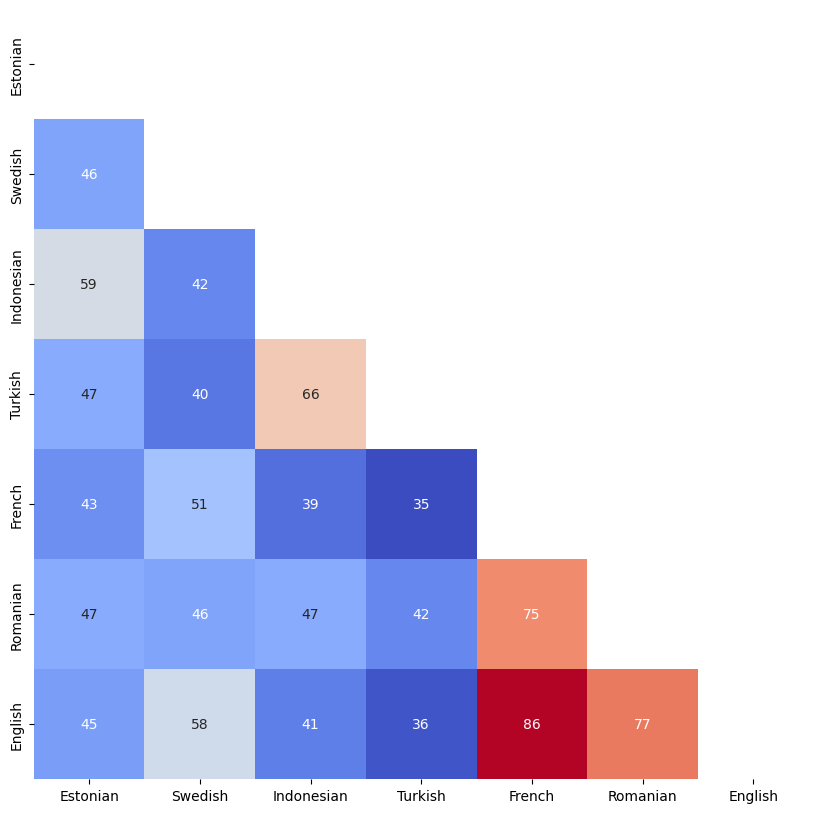

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Calculate number of shared trigrams
labels = lang
mat = []
for i in labels:
    vec = []
    for j in labels:
        l1 = features[i]
        l2 = features[j]
        intersec = [l for l in l1 if l in l2] 
        # print(intersec)
        vec.append(len(intersec))
    mat.append(vec)

#Plot heatmap
conf_matrix_df = pd.DataFrame(mat,columns=lang,index=lang)
# Create a mask
mask = np.triu(np.ones_like(conf_matrix_df, dtype=bool))


plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
# sns.set(font_scale=1.5)
sns.heatmap(conf_matrix_df,cmap='coolwarm',annot=True,fmt='.5g',cbar=False, mask=mask,)

plt.savefig('./feat_explore.png',format='png',dpi=150)

In [17]:
# STEP 2: Write a Dataset class for creating the train and test datasets (and corresponding dataloaders).
#########
from torch.utils.data import Dataset, DataLoader, random_split, Subset

batch_size = 8
train_dataloader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_dataloader = DataLoader(val_data, batch_size=batch_size)

In [18]:
# SCOTT ADDED this cell

from torch.utils.data import Dataset
from torchvision import transforms


# https://discuss.pytorch.org/t/typeerror-batch-must-contain-tensors-numbers-dicts-or-lists-found-object/14665/3
#For example add to the __init__:
# self.transform = transforms.Compose([transforms.ToTensor()])  
#and in __getitem__ do:
# return self.transform(self.x_data[index]), self.transform(self.y_data[index])

class PandasDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.transform = transforms.Compose([transforms.ToTensor()])  

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        stuff = self.dataframe.iloc[index]
        return self.transform(stuff)
    

# https://stackoverflow.com/questions/58612453/keyerror-when-enumerating-over-dataloader
class PandasDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        return self.dataframe.iloc[index]


# https://stackoverflow.com/questions/58612453/keyerror-when-enumerating-over-dataloader
class PandasDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        thing = self.dataframe.iloc[index]
        thing = thing.tolist()
        print(thing)
        return thing


# https://stackoverflow.com/questions/58612453/keyerror-when-enumerating-over-dataloader
class PandasDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        thing = self.dataframe.iloc[index]
        
        t1 = thing.drop('lang').astype(np.float32)
        t1 = t1.tolist()
        t1 = torch.tensor(t1)
        
        t2 = thing['lang'].astype(np.int64)
        
        thing = [t1,t2]
        #print(thing)
        return thing

    
# SCOTT ADDED
train_dataloader = DataLoader(PandasDataset(train_data), shuffle=True, batch_size=batch_size)
val_dataloader = DataLoader(PandasDataset(val_data), batch_size=batch_size)

In [19]:
# STEP 3: Define the neural network model.
#########

# https://towardsdatascience.com/deep-neural-network-language-identification-ae1c158f6a7d

try:
    from sklearn.preprocessing import LabelEncoder
    from keras.utils import np_utils

    def fit_encoder():
        #Fit encoder
        encoder = LabelEncoder()
        encoder.fit(['deu', 'eng', 'fra', 'ita', 'por', 'spa'])

    def encode(y):
        """
        Returns a list of one hot encodings
        Params
        ---------
            y: list of language labels
        """

        y_encoded = encoder.transform(y)
        y_dummy = np_utils.to_categorical(y_encoded)

        return y_dummy


    from keras.models import Sequential
    from keras.layers import Dense

    def define_model_keras():
        #Define model
        model = Sequential()
        model.add(Dense(500, input_dim=663, activation='relu'))
        model.add(Dense(500, activation='relu'))
        model.add(Dense(250, activation='relu'))
        model.add(Dense(6, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
except:
    print('keras part not executed')

# loss='categorical_crossentropy',
# optimizer='adam', 
# activation fns: relu x3, softmax x1


# lab3/lab3_mlp_classif.ipynb
# 237:    "However, when training a classification network, we generally use the [Cross Entropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) loss function, which alleviates these two issues. This loss is optimized for handling true labels instead of true probabilities per class, so you don't have to worry about it. Besides, it will automatically apply a [Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) non-linearity to the predicted outputs, in order to normalize them as probabilities per class.\n",

# https://adamoudad.github.io/posts/keras_torch_comparison/syntax/

import torch
import torchvision
import torch.nn as nn
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
from torch.utils.data import DataLoader, random_split, Subset
import copy

class ClassifModel(nn.Module):
    def __init__(self , input_size , output_size
                 , hidden_size=500
                 , act_fn=nn.ReLU()
                 , n_hidden_layers=1 ):
        super(ClassifModel, self).__init__()

        self.input_layer = nn.Sequential(nn.Linear(input_size, hidden_size), act_fn)

        self.hiddens = nn.ModuleList([])
        for i in range(n_hidden_layers):
            self.hiddens.append( nn.Sequential(nn.Linear(hidden_size, hidden_size), act_fn) )

        print('len of self.hiddens:', len(self.hiddens))

        alt_hidden_size = 250
        # This one is not in the hiddens loop because it has a different out_features size
        self.hidden2 = nn.Sequential( nn.Linear(hidden_size, alt_hidden_size), act_fn )

        # self.output_layer = nn.LazyLinear(output_size)
        self.output_layer = nn.Linear(alt_hidden_size, output_size)

        # NOTE: Unlike keras, we do not need a final softmax fn at the outputs,
        # because it's not necessary with torch.nn.CrossEntropyLoss.
        # https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#
        # https://discuss.pytorch.org/t/do-i-need-to-use-softmax-before-nn-crossentropyloss/16739

    def forward(self, x):
        x = self.input_layer(x)

        if len(self.hiddens) != 0:
            for i, l in enumerate(self.hiddens):
                x = self.hiddens[i](x)

        x = self.hidden2(x)
        out = self.output_layer(x)
        return out


def test_model():
    INPUT_SIZE = 663
    output_size = num_languages # e.g. 7 or 22
    model = ClassifModel(INPUT_SIZE, output_size)
    return model

#test_model()

keras part not executed


In [20]:
# STEP 4: Define the hyperparameters to create an instance of the model 
# (e.g., hidden space size, number of convolution kernels...) 
# as well as the parameters required to train neural network (e.g., learning rate).
#########

# The Conor O'Sullivan article uses adam from Keras with default learning rate,
# and default there is 0.001: https://keras.io/api/optimizers/adam/
learning_rate = 0.001

# lab4/lab4.2_scott.ipynb
# 363:    "    optimizer = torch.optim.Adam(model_tr.parameters(), lr=learning_rate)\n",

optimizer = torch.optim.Adam#(model_tr.parameters(), lr=learning_rate)


In [21]:
# STEP 5: Write the training loop for training the model.
#########


##########################
#from lab 4.1

# Evaluation function: similar to the training loop, except we don't need to compute any gradient / backprop
def eval_mlp_classifier(model, eval_dataloader):
    
    # Set the model in 'evaluation' mode (this disables some layers (batch norm, dropout...) which are not needed when testing)
    model.eval() 

    # In evaluation phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        # initialize the total and correct number of labels to compute the accuracy
        correct_labels = 0
        total_labels = 0
        
        # Iterate over the dataset using the dataloader
        for images, labels in eval_dataloader:

            # Get the predicted labels
            
            #images = images.reshape(images.shape[0], -1)
            y_predicted = model(images)
            
            # To get the predicted labels, we need to get the max over all possible classes
            _, label_predicted = torch.max(y_predicted.data, 1)
            
            # Compute accuracy: count the total number of samples, and the correct labels (compare the true and predicted labels)
            total_labels += labels.size(0)
            correct_labels += (label_predicted == labels).sum().item()
    
    accuracy = 100 * correct_labels / total_labels
    
    return accuracy
##############################



#############################
#from lab 4.1

# TO DO: write the training function with validation
# - the overall training procedure is similar to what was done in lab 3 (reuse it)
# - at the end of each epoch, compute the accuracy of the model on the validation subset using the provided evaluation function
# - then, check if this accuracy is increasing: if so, then we save the current model as the 'model_opt'.
# - return as output the trained model, the training loss, and the validation accuracy
##############################

def pltListOverEpochs(losses, title='Loss over epochs', ylab='loss', xlab='epoch'):
    plt.figure()
    plt.title(title)
    epochs = range(1, len(losses)+1)
    plt.plot(epochs, losses, 'g+')
    plt.xlabel(xlab), plt.ylabel(ylab)
    plt.show()

#############################

In [22]:
#######################
# from lab 4.2
def train_val_classifier(model, train_dataloader, eval_dataloader, 
                         num_epochs, loss_fn, learning_rate, verbose=True):
    """Training function with validation. 
    
    (Similar to lab 4.2 etc). 
    Important NOTE: if we compute the validation loss, it should decrease. If we compute accuracy, it should increase.
"""

    # Make a copy of the model (avoid changing the model outside this function)
    model_tr = copy.deepcopy(model)
    model = None # for safety
    model_tr.train() # Set the model in 'training' mode 
    
    # Define the optimizer
    optimizer = torch.optim.Adam(model_tr.parameters(), lr=learning_rate)
    
    # Initialize a list to record the training loss over epochs
    loss_all_epochs = []
    altLossAllEpochs = [] # Alternate method, loss
    evalAllEpochs = [] # list of validation metric (e.g. loss or accuracy)
    
    # Training loop
    for epoch in range(num_epochs):
        # Initialize the training loss for the current epoch
        loss_current_epoch = 0
        altLCEs = [] # Alternate method
        
        #print(train_dataloader)
        
        # Iterate over batches using the dataloader
        for batch_index, (images, labels) in enumerate(train_dataloader):
            # training procedure for each batch...
            #print(batch_index, images, labels)
            
            # - vectorizing the images (size should be (batch_size, input_size))
            #batch_size = 8
            #input_size = num_languages
            #vectorized_batch = images.reshape(batch_size, input_size)
            #print(vectorized_batch.shape)
            
            
            # we are not using images this time # TBD clean this up
            #vectorized_batch = torch.tensor(np.array( images[0] )) 
            
            #vectorized_batch = torch.tensor( np.fromstring( (images[0]) , dtype=int ) )
            
            #tensor_ = torch.from_numpy( images.to_numpy().astype(np.float32))
            #vectorized_batch = tensor_
            
            #images = images.reshape(images.shape[0], -1)
            
            vectorized_batch = images
            
            
            y = labels # the prediction targets 
            y_pred = model_tr(vectorized_batch) #step1, forward pass (calculate predicted labels)
            
            #print(y_pred, y)
            
            l = loss_fn(y_pred, y) #step2
            optimizer.zero_grad()
            l.backward() # step3, compute the gradients
            optimizer.step() #step4, (?apply gradient descent algorithm?)
            
            # update the loss at the current epoch
            loss_current_epoch += l.item()
            #print(batch_index, '::', l.item() )
            
            altLCEs.append(l.item())
            nBatchesThisEpoch = batch_index + 1

        # At the end of each epoch, record and display the loss over all batches
        loss_all_epochs.append(loss_current_epoch)
        
        altLossAvgThisEpoch = sum(altLCEs) / nBatchesThisEpoch
        altLossAllEpochs.append(altLossAvgThisEpoch)
        
        # at end of each epoch, compute the validation metric (e.g. accuracy, loss) of the model on validation subset 
        this_eval = eval_mlp_classifier(model_tr, eval_dataloader)
        evalAllEpochs.append(this_eval)
        #last_eval = evalAllEpochs[epoch-1]

        #print( 'this eval {}, min eval {}'.format(this_eval, min(evalAllEpochs)) )
        # is eval metric improving? if so, then we save the current model as the 'model_opt'.
        if len(evalAllEpochs) == 1:
            print('only one eval done yet')
            model_opt = model_tr
        elif (this_eval >= min(evalAllEpochs)) and (this_eval not in evalAllEpochs[:-1]):
            # <= for "is LOSS DEcreasing", or >= for "is accuracy increasing"
            print('saving model from epoch {} as new model_opt'.format(epoch+1))
            model_opt = model_tr

        if verbose:
            #print('TRAINING Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss_current_epoch))
            print('TRAINING Epoch [{}/{}], Loss: {:.4f}, altLoss: {:.4f}, this_eval: {:.4f}'.format(
                epoch+1, num_epochs, loss_current_epoch, altLossAvgThisEpoch, this_eval
            ))
            #print(nBatchesThisEpoch)

    training_loss = altLossAllEpochs
    validation_metric = evalAllEpochs
    
    return model_opt, training_loss, validation_metric
    #return model_tr, altLossAllEpochs
    


In [23]:
# STEP 6: Evaluate the model on the test data. 
# In this part, it is expected to choose an appropriate evaluation metric based on your task. 
# For instance, for classification task, accuracy should be computed (but you can also search for 'precision' and 'recall').
#########

# Execute the training (with validation)

LOSS_FN = torch.nn.CrossEntropyLoss
OPTIMIZER = torch.optim.Adam 
# invoked as so: torch.optim.Adam(model_tr.parameters(), lr=learning_rate)
# currently this is hardcoded inside train_val_classifier()

if True:
    batch_size = 8
    train_dataloader = train_dataloader
    val_dataloader = val_dataloader

    input_size = num_trigram_features
    output_size = num_languages # e.g. 7 or 22
    
    model = ClassifModel(input_size, output_size)
    
    num_epochs = 10
    loss_fn = LOSS_FN 
    learning_rate = learning_rate
    
    optimizer = OPTIMIZER
    
    mod, losses, evals = train_val_classifier(model, train_dataloader, val_dataloader, 
                                              num_epochs, loss_fn(), learning_rate, 
                                              verbose=True )


    
# Finally, execute testing/eval also on the test data


len of self.hiddens: 1
only one eval done yet
TRAINING Epoch [1/10], Loss: 90.0790, altLoss: 0.1344, this_eval: 98.1513
TRAINING Epoch [2/10], Loss: 17.4865, altLoss: 0.0261, this_eval: 98.1513
saving model from epoch 3 as new model_opt
TRAINING Epoch [3/10], Loss: 7.0016, altLoss: 0.0105, this_eval: 97.9832
saving model from epoch 4 as new model_opt
TRAINING Epoch [4/10], Loss: 9.7142, altLoss: 0.0145, this_eval: 98.6555
TRAINING Epoch [5/10], Loss: 1.1110, altLoss: 0.0017, this_eval: 98.1513
TRAINING Epoch [6/10], Loss: 5.4610, altLoss: 0.0082, this_eval: 97.9832
saving model from epoch 7 as new model_opt
TRAINING Epoch [7/10], Loss: 2.5572, altLoss: 0.0038, this_eval: 98.8235
TRAINING Epoch [8/10], Loss: 0.0654, altLoss: 0.0001, this_eval: 98.8235
TRAINING Epoch [9/10], Loss: 0.0043, altLoss: 0.0000, this_eval: 98.8235
TRAINING Epoch [10/10], Loss: 0.0017, altLoss: 0.0000, this_eval: 98.8235


In [25]:
print(mod)
print(losses)
print(evals)


ClassifModel(
  (input_layer): Sequential(
    (0): Linear(in_features=822, out_features=500, bias=True)
    (1): ReLU()
  )
  (hiddens): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=500, out_features=500, bias=True)
      (1): ReLU()
    )
  )
  (hidden2): Sequential(
    (0): Linear(in_features=500, out_features=250, bias=True)
    (1): ReLU()
  )
  (output_layer): Linear(in_features=250, out_features=7, bias=True)
)
[0.1344463285128678, 0.026099318672639652, 0.010450133734858138, 0.014498848631949902, 0.00165828186378907, 0.00815070304471615, 0.003816772701643994, 9.758134179967545e-05, 6.452492934452701e-06, 2.476141121743325e-06]
[98.15126050420169, 98.15126050420169, 97.98319327731092, 98.65546218487395, 98.15126050420169, 97.98319327731092, 98.82352941176471, 98.82352941176471, 98.82352941176471, 98.82352941176471]


In [24]:
# STEP 7: Save the trained model parameters, and the obtained results if needed.
#########
            
            



len of self.hiddens: 1
only one eval done yet
TRAINING Epoch [1/10], Loss: 96.4513, altLoss: 0.1440, this_eval: 98.4874
saving model from epoch 2 as new model_opt
TRAINING Epoch [2/10], Loss: 17.3390, altLoss: 0.0259, this_eval: 97.3109
saving model from epoch 3 as new model_opt
TRAINING Epoch [3/10], Loss: 8.8517, altLoss: 0.0132, this_eval: 98.3193
saving model from epoch 4 as new model_opt
TRAINING Epoch [4/10], Loss: 3.8096, altLoss: 0.0057, this_eval: 98.1513
TRAINING Epoch [5/10], Loss: 0.5370, altLoss: 0.0008, this_eval: 98.1513
TRAINING Epoch [6/10], Loss: 0.0086, altLoss: 0.0000, this_eval: 98.1513
TRAINING Epoch [7/10], Loss: 0.0037, altLoss: 0.0000, this_eval: 98.1513
TRAINING Epoch [8/10], Loss: 0.0023, altLoss: 0.0000, this_eval: 98.3193
TRAINING Epoch [9/10], Loss: 0.0013, altLoss: 0.0000, this_eval: 98.1513
saving model from epoch 10 as new model_opt
TRAINING Epoch [10/10], Loss: 0.0008, altLoss: 0.0000, this_eval: 97.9832
            
            
            
            
len of self.hiddens: 1
only one eval done yet
TRAINING Epoch [1/10], Loss: 462.8808, altLoss: 0.2200, this_eval: 97.9679
saving model from epoch 2 as new model_opt
TRAINING Epoch [2/10], Loss: 121.9518, altLoss: 0.0580, this_eval: 98.3422
saving model from epoch 3 as new model_opt
TRAINING Epoch [3/10], Loss: 69.6424, altLoss: 0.0331, this_eval: 98.5561
saving model from epoch 4 as new model_opt
TRAINING Epoch [4/10], Loss: 54.3106, altLoss: 0.0258, this_eval: 98.6096
TRAINING Epoch [5/10], Loss: 27.7823, altLoss: 0.0132, this_eval: 98.3422
saving model from epoch 6 as new model_opt
TRAINING Epoch [6/10], Loss: 34.5034, altLoss: 0.0164, this_eval: 98.2888
saving model from epoch 7 as new model_opt
TRAINING Epoch [7/10], Loss: 37.0910, altLoss: 0.0176, this_eval: 98.5027
saving model from epoch 8 as new model_opt
TRAINING Epoch [8/10], Loss: 19.7543, altLoss: 0.0094, this_eval: 98.4492
saving model from epoch 9 as new model_opt
TRAINING Epoch [9/10], Loss: 19.1647, altLoss: 0.0091, this_eval: 98.0214
TRAINING Epoch [10/10], Loss: 14.6791, altLoss: 0.0070, this_eval: 98.2888






## Useful references

https://towardsdatascience.com/how-to-set-up-anaconda-and-jupyter-notebook-the-right-way-de3b7623ea4a  


### 

https://stackoverflow.com/questions/20186344/importing-an-ipynb-file-from-another-ipynb-file  

https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Importing%20Notebooks.html  


###

https://stackoverflow.com/questions/50307707/how-do-i-convert-a-pandas-dataframe-to-a-pytorch-tensor

https://stackoverflow.com/questions/55724123/typeerror-cant-convert-np-ndarray-of-type-numpy-object

https://stackoverflow.com/questions/56741087/how-to-fix-runtimeerror-expected-object-of-scalar-type-float-but-got-scalar-typ

https://stackoverflow.com/questions/47488598/attributeerror-crossentropyloss-object-has-no-attribute-backward

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

https://lightrun.com/answers/biocore-ntnu-pyranges-deprecation-of-nplong-in-numpy-120-in-merge-method
